# Intro to Clustering

__Learning Objective__

* Explain the different types of clustering algorithms and their use cases.
* Describe the K-Means Clustering technique.
* Describe accuracy concerns for the K-Means Clustering technique.
* Explain the Hierarchical Clustering technique.
* Provide an overview of the agglomerative algorithm for hierarchical clustering.
* List the advantages and disadvantages of using Hierarchical Clustering.
* Describe the capabilities of the density-based clustering called DBSCAN.
* Apply clustering on different types of datasets.

Customse segemenation - practice of partitioning a customer base into groups that have similar characteristics (business strategy to allocate marketing resources effectively.)

Examples


Need an aanalytical approach to segmentate large curtomer datasets

Clustering for segmentation

* Most popular approach to customer segmentation
* Unsupervised ML approach
* Aim to partition customers into mutually exclusive or non-overlapping groups


What is clustering?

A _cluster_ is a group of objects that share similar features or characteristics and dissimilar features ot other objects in other groups.

What's the difference between Clustering and Classification?

Classification predict labels or values of categorical variables.
__Labeled datas__ is required for training. Supervised learning.

Culstering deals with __unlabeled data__. To group objetcs in a dataset.

_Can you explain some of the applications of clustering?_

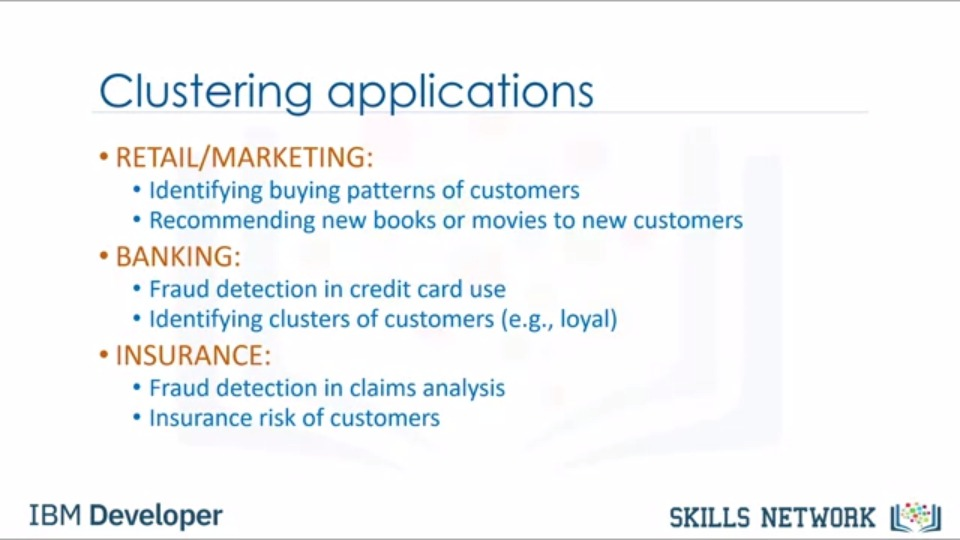


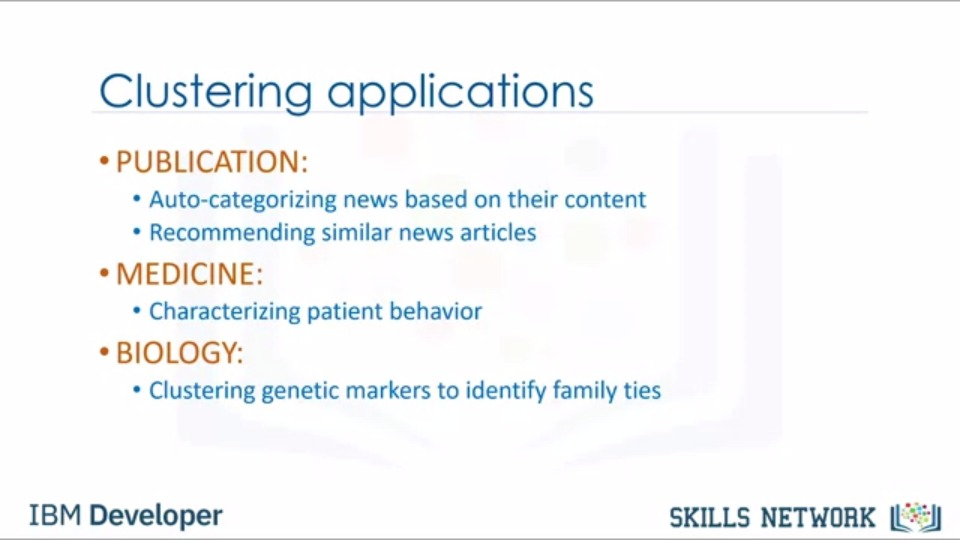

Why clustering?

* Exploatory data analysis
* Summary generation
* Outlier detection
* Finding duplicates 


Clustering algorithms

* Partitioned-based clustering
    * Relatively efficient
    * K-means, K-median, Fuzzy c-means
    * Produces spherical shaped clusters
* Hirarchical clustering
    * Produces trees of clusters
    * e.g., agglomerative, divisive
    * Good to use with small datasets
* Density-based clustering
    * Produces arbitrary shaped clusters
    * DBSCAN algorithm

# k-Means Clustering

* Parititioning clustering
* Divides data into k non-overlapping subsets or clusters without labels
* Objetcs within clusters are very similar
* Objects across different clusters are very different

What's the objective of k-means?

* We minimise the intra-cluster distance between objetcs and maximize the inter-cluster distance


* Minkowski distance (Euclidean distance would work fine)
* can be applied to multi dimensional data
* Data must be normalise our feature set
* Other dissimilarity measures: Euclidean distance, cosine similarity, average distance.

_NOTE_
* Dissimilarity measures highly control how clusters are formed
* Choosing the right measure should be based on knowledge based on your data and data type

_How does it work?_

1. Initialization
Pick a numbe of clusters k
Choose a random centre point for each cluster (_centroids_) in the feature space of the data set.
Main approachtes to this
    
    a. Pick three points from the data set at random as centroids
    b. Pick three points at random in the feature space where data lives
    
2. Distance calculation
Measure the distance from each point to each centroid accoridng to a purpose-selected metric.

Gather all the data into a _distance matrix_

3. Assign each point to the closest centroid
Usually classification will be really poor
Compute error as the sum of squared distances

4. Compute the new centroids for each cluster 
Take the empirical mean for all data points in each centre 
Then take this as the new _centroid_

5. Recluster 
Repeat iteratuvely until cluster centroids no longer move, i.e., the algorithm converges.

Caveats

This is a heuristic algorithm
The algorithm is guaranteed to converge to a result, not necessarily the optimal solution
Can be initialized with different starting conditions

## k-means accuracy

Summary of the algorithm

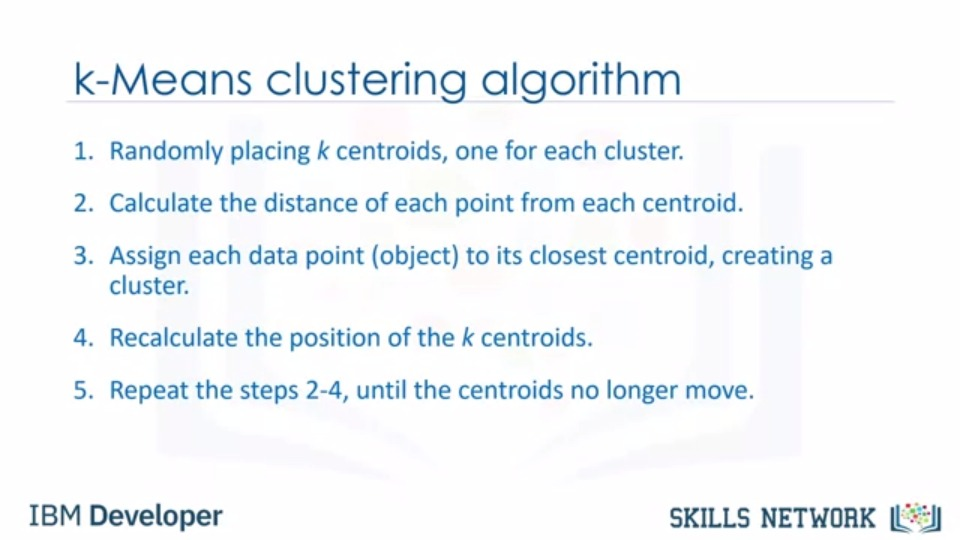

_How do we assess the goodness or the accuracy of the clustering?_

* External approach
    Cmparing the clustering classification to the ground truth, if available.
* Internal approach
    Average the distance to the centroid for data points within a cluster

Choosing k

* Frequent problems.
* Often ambiguous.
* Depends on the shape and scale of distribution of points in dataset

Usual approach to choose k

* Run the k-means for several values of k
* Look at some metric of accuracy for clustering
* But, increasing k will always reduce the error
* A workaround for this is the __elbow method__
> The right value of `k` is chosen for the `elbow point`. The point where the rate of decrease sharply shofts. 

K-means RECAP

* Great for med and large datasets
* Produces sphere-like clusters
* Drawback: need to pre-specify k, and often choosing k is not easy

## Practical

In [4]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs # different in original NB

In [5]:
%matplotlib inline

In [6]:
np.random.seed(0)

Generate sample dataset

In [7]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

This as generated assuming
* 5000 data points
* $k=4$ in a 2D feature space
* and fixed cluster `std`
* `y` is the response variable (ground truth)

In [12]:
X

array([[-1.82150565,  0.07098024],
       [ 2.16732621, -2.93199608],
       [ 0.8465158 , -3.26075305],
       ...,
       [ 3.29772603,  4.24400152],
       [-1.69503125, -0.29979681],
       [-1.64362141,  0.63035513]])

In [13]:
y

array([1, 2, 2, ..., 0, 1, 1])

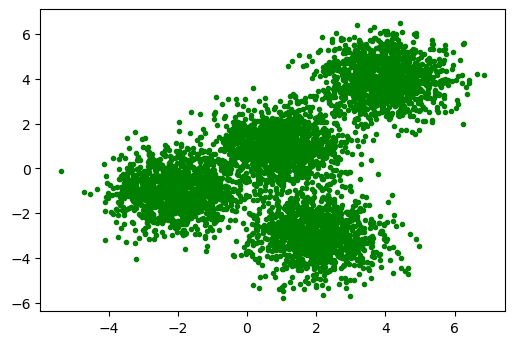

In [16]:
fig = plt.figure(dpi=100)
plt.scatter(X[:,0], X[:,1], marker='.', color='green')
plt.show()

Set up the model

In [17]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)

* `init` is the initialization method. Here `k-means++`, which selects cluster centres of k-means clustering in a smart way to speed up convergence. 
* `n_clusters` number of centroids
* `n_init` is the number of times k-means will be run with different centroid seeds.

In [18]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [19]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [20]:
k_means_centers = k_means.cluster_centers_
k_means_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

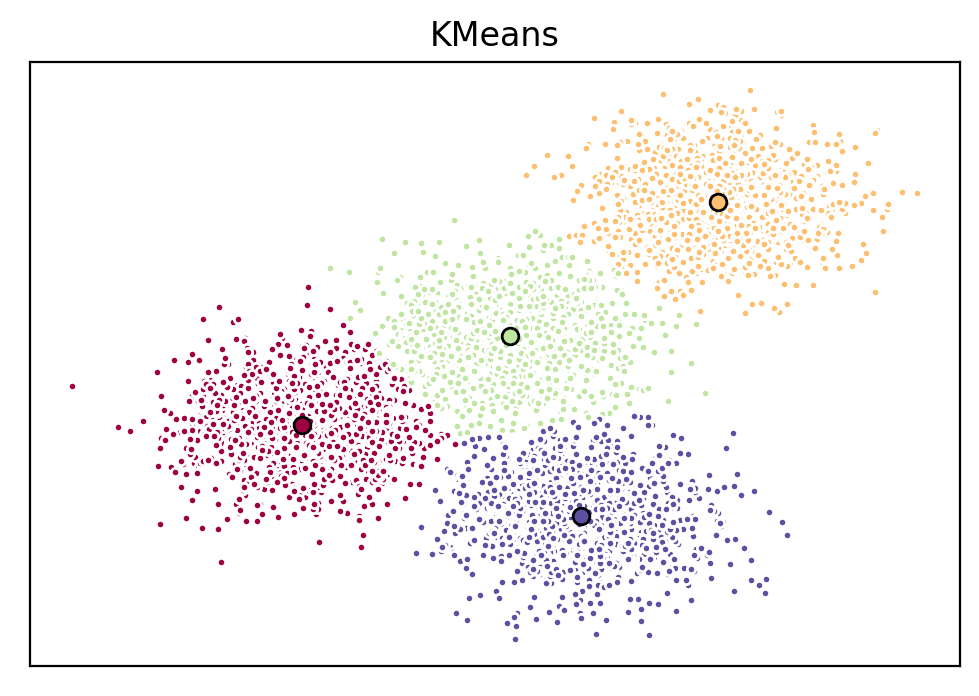

In [23]:
fig, ax  = plt.subplots(1,1,figsize=(6, 4), dpi=200)

colors = plt.cm.Spectral(np.linspace(0,1, len(set(k_means_labels))))

for k, col in zip(range(4), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_centers[k]
    # plot data points
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    # plot centroids
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

## Further practice

Assume 3 clusters instead of 4

In [24]:
k_means = KMeans(init="k-means++", n_clusters=3, n_init=12)

In [26]:
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_centers = k_means.cluster_centers_

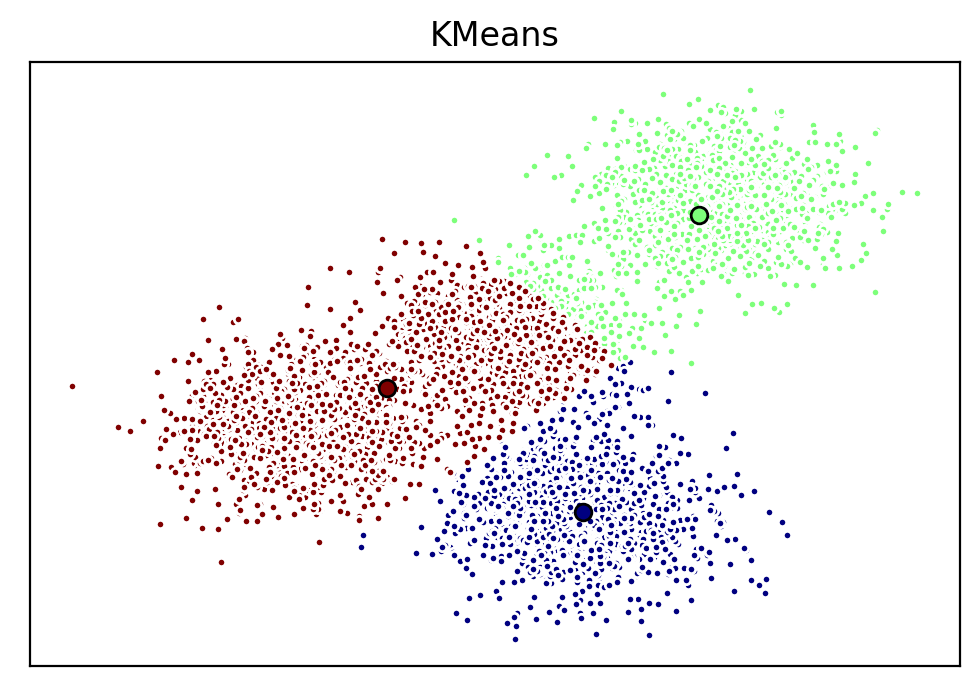

In [28]:
fig, ax  = plt.subplots(1,1,figsize=(6, 4), dpi=200)

colors = plt.cm.jet(np.linspace(0,1, len(set(k_means_labels))))

for k, col in zip(range(3), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_centers[k]
    # plot data points
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    # plot centroids
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

## Customer segmentation

In [29]:
import pandas as pd

In [30]:
df = pd.read_csv("Cust_Segmentation.csv")

In [32]:
df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2

Preprocessing

<span style="color:red"><b>NOTE</b></span> Note that __Address__ is a categorical variable. The k-means algorithm is not directly applicable to categorical vairables because the Euclidean disntace isn't really meaningful for discrete variables. 

We drop this variable

In [33]:
df = df.drop("Address", axis=1)
df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  
0        0.0              6.3  
1        0.0             12.8  
2        1.0             20.9  
3        0.0              6.3  
4        0.0              7.2

Normalize data over standard deviation

<span style="color:red"><b>NOTE</b></span> Why do we need normalization?
Normalization helps algorithms to interpret featires with different magnitudes and distributions equally (?). 

We use `StandardScale()` for this.

In [34]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

Modelling

In [35]:
k_means = KMeans(init="k-means++", n_clusters=3, n_init=12)
k_means.fit(X)
labels = k_means.labels_

In [36]:
labels

array([0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,

In [37]:
df["Clus_km"] = labels
df.head(5)

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  Clus_km  
0        0.0              6.3        0  
1        0.0             12.8        2  
2        1.0             20.9        0  
3        0.0              6.3        0  
4        0.0              7.2        1

We can check the cluster centroids

In [38]:
df.groupby('Clus_km').mean()

Customer Id        Age       Edu  Years Employed      Income  \
Clus_km                                                                 
0         432.468413  32.964561  1.614792        6.374422   31.164869   
1         410.166667  45.388889  2.666667       19.555556  227.166667   
2         402.295082  41.333333  1.956284       15.256831   83.928962   

         Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Clus_km                                                     
0         1.032541    2.104133   0.285185        10.094761  
1         5.678444   10.907167   0.285714         7.322222  
2         3.103639    5.765279   0.171233        10.724590

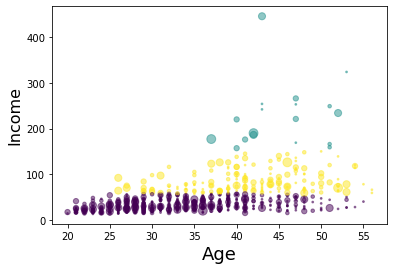

In [40]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

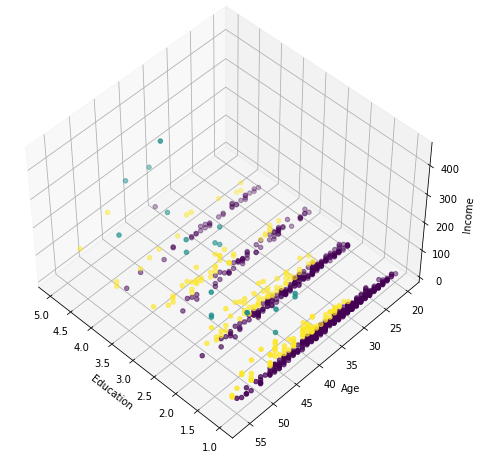

In [42]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(float))


# Intro to Hierarchical Clustering

Ways to construct a hierarchical cluster

* Divisive (Top-down)
A cluster is broken down into smaller clusters

* Agglomerative (Bottom up)
Pairs of clusters are merged together
MORE POPULAR amongst data scientists.


Which citites do we first merge into a cluster?

* We construct a distance matrix for all individual cities (leave clusters).

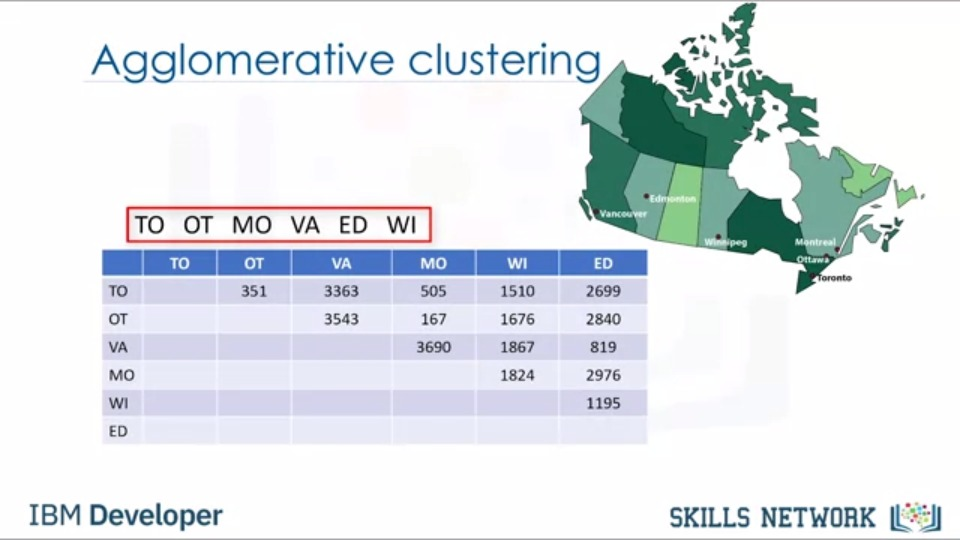

* Then, we merge the two citites with the lowest distance into one single cluster.

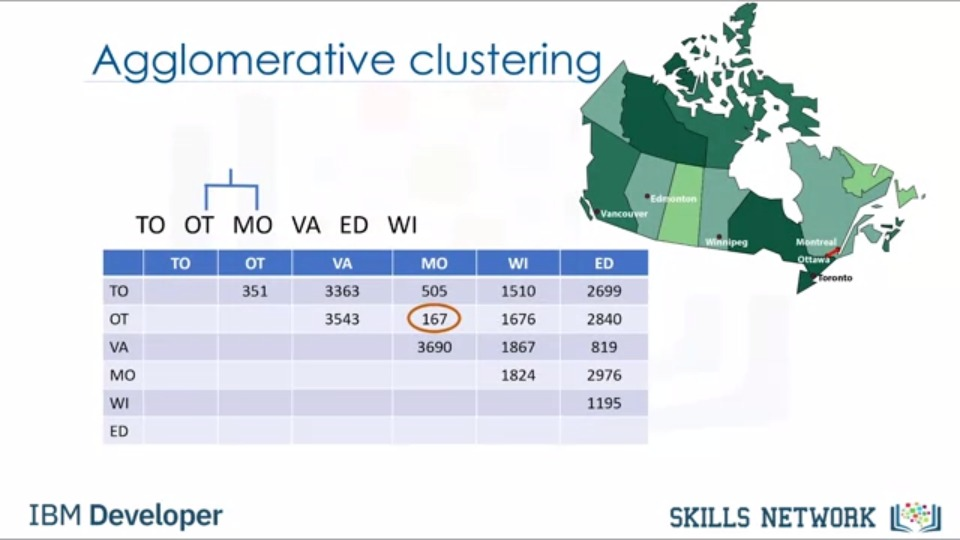

* Next, we calculate the distance from each city to this newly formed cluster, and we update the distance matrix.

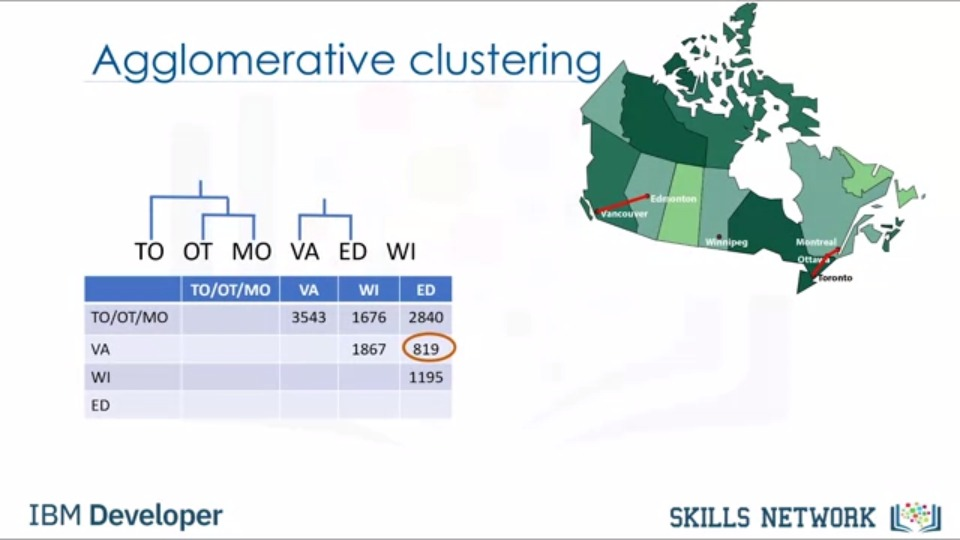

* The distances between each city and the centre of the cluster (mid point between the centres of the two city cluster).

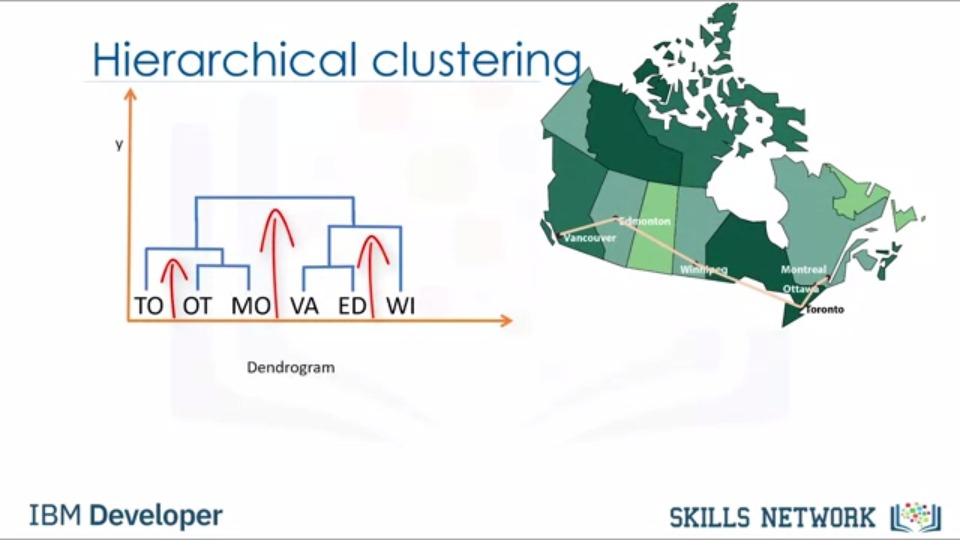

* We repeat the process until we obtain one single cluster

_NOTE_ Here Euclidean distance was used, however, other distance metrics can be employed depending on the data type or domain knowledge, e.g., Average distance, Pearson distance  (EXAMPLE?)

_NOTE_ A hierarchical cluster is typically represented as a _dendogram_, each merges is represented by horizontal lines, the vertical position indicates the similarity of the two clusters that were merged. The dendogram allows to reconstruct the history of merges.